In [11]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [12]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")
split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
pls_max_n_comp = util.get_config_values("general", list_type=False, key="pls_max_n_comp")
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(880,2210,5.2) # Set wavelength range

In [13]:
# import os
# import pandas as pd
# #list the files
# all_files = os.listdir()
# csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
# #read them into pandas
# df_list = []
# for file in csv_files:
#     data = pd.read_csv(file, sep=";")
#     data.set_index("Timestamp")
#     #print(data)
#     df_list.append(data)
# #concatenate them together
# big_df = pd.concat(df_list, ignore_index=True)
# X = big_df.drop(axis=1,columns=['Timestamp', 'TS_sim']) # drop the last column, so we have exactly 256 features
# y = big_df['TS_sim']

<h2 style="color: #dddda1">Pipeline 1 (1 File + SAVGOL0 + KFOLDS CV + PLS + MSE)</h2>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_07_13.csv , Preprocessor : savgol0, Model : pls, Evaluator : mse
INFO Validation type : kfold-cv, PLS max n_comp : 40, folds (for CV) : 10
INFO [PRE PROCESSING]
INFO Least MSE from SAVGOL loop run 4.480197462136637
INFO Best window size 3
INFO Best polyorder 2
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 12
INFO [MODEL EVALUATION]




[Model Evaluation] MSE value between y_test and y_pred : 0.254


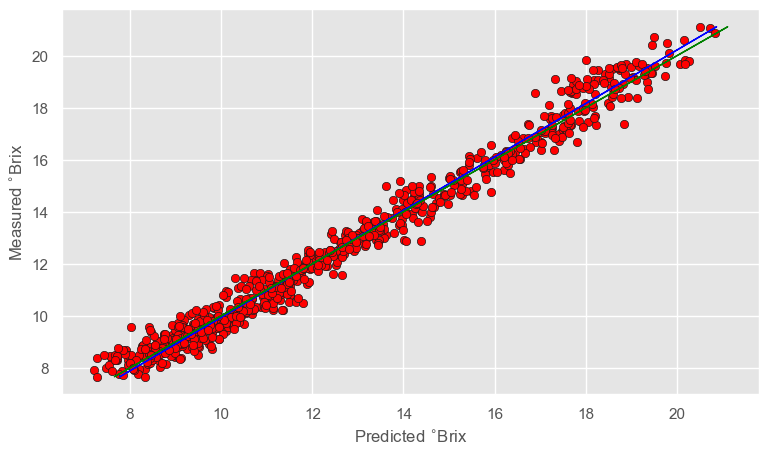

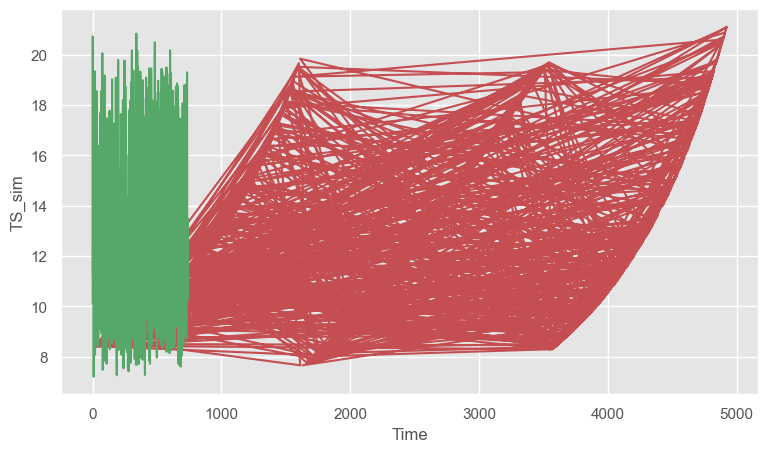

INFO Model loss : 0.25408611427628913
INFO Elapsed time for pipeline run : 33.05
INFO Pipeline end...
INFO ************************************


In [14]:
dataset = files[0]        # choose no. of files and which file
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]))

preprocessor_params = {
    'savgol' : {
        'window_size_range' : np.arange(3,63,3),
        'polyorder_range' : np.arange(2,18,2),
        'derivative' : 0
    }
}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],
    'preprocessor' : preprocessors[0],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
            + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h2 style="color: #dddda1">Pipeline 2 (3 Files + SAVGOL2 + STRATIFIED-KFOLDS CV + PLS + MSE)</h2>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv'] , Preprocessor : savgol2, Model : pls, Evaluator : mse
INFO Validation type : stratified-kfold-cv, PLS max n_comp : 40, folds (for CV) : 10
INFO [PRE PROCESSING]
INFO Least MSE from SAVGOL loop run 8.897056596473952
INFO Best window size 3
INFO Best polyorder 2
INFO [VALIDATION AND HYPERPARAMETER (N_COMP) TUNING]


100% Validation completed 

INFO Optimized n_comp for PLS 32
INFO [MODEL EVALUATION]




[Model Evaluation] MSE value between y_test and y_pred : 0.278


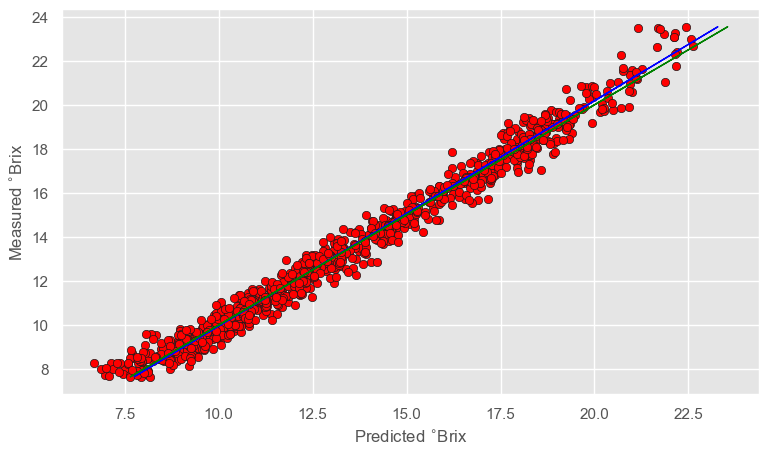

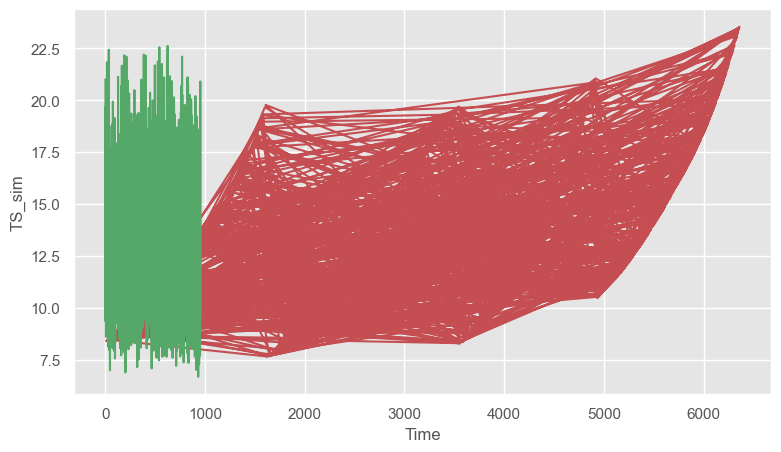

INFO Model loss : 0.27812278242631944
INFO Elapsed time for pipeline run : 65.65
INFO Pipeline end...
INFO ************************************


In [10]:
dataset = [files[0], files[1]]      # choose no. of files and which file
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]))

preprocessor_params = {
    'savgol' : {
        'window_size_range' : np.arange(3,63,3),
        'polyorder_range' : np.arange(2,18,2),
        'derivative' : 0
    }
}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[1],
    'preprocessor' : preprocessors[2],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", PLS max n_comp : "
            + str(pipeline_params['pls_max_n_comp']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h2 style="color: #dddda1">Pipeline 3 (2 Files + MSC + STRATIFIED-KFOLDS CV + PLS + MSE)</h2>

100% Validation completed 

Best and optimized n_components value for PLS model : 29
[Model Evaluation] MSE value between y_test and y_pred : 0.292


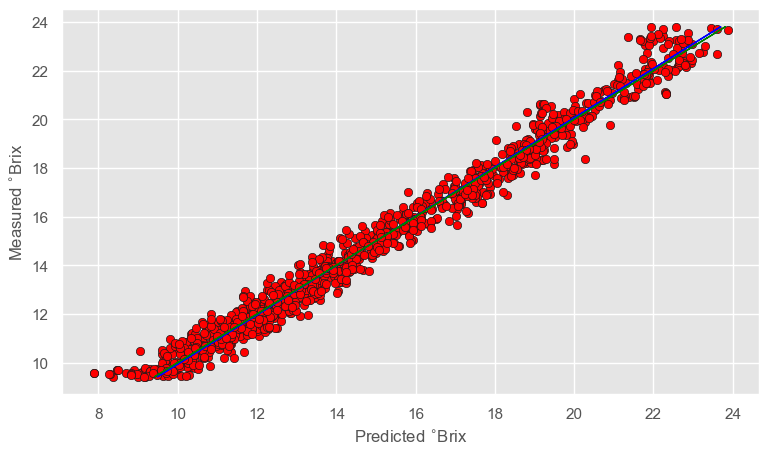

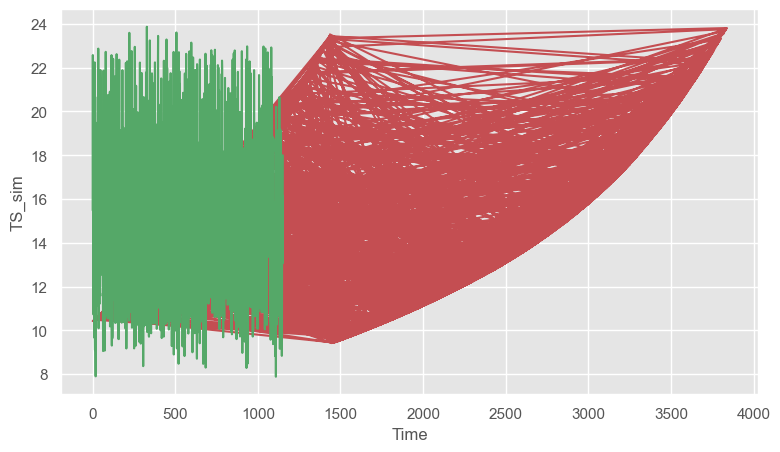

Elapsed time (in secs) :  37.4


In [4]:
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=[files[1], files[2]], split_params=split_params, test_size=float(split_size[3]))

preprocessor_params = {}

pipeline_params = {
    'data' : data,
    'validation-type' : validation_types[1],
    'preprocessor' : preprocessors[3],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
util.pipeline(pipeline_params)
end = timer()
print(f"Elapsed time (in secs) : ",round((end - start),2))

<h2 style="color: #dddda1">Pipeline 4 (4 Files + SAVGOL1+SNV + STRATIFIED-KFOLDS CV + PLS + MSE)</h2>

100% Validation completed 

Best and optimized n_components value for PLS model : 39
[Model Evaluation] MSE value between y_test and y_pred : 0.479


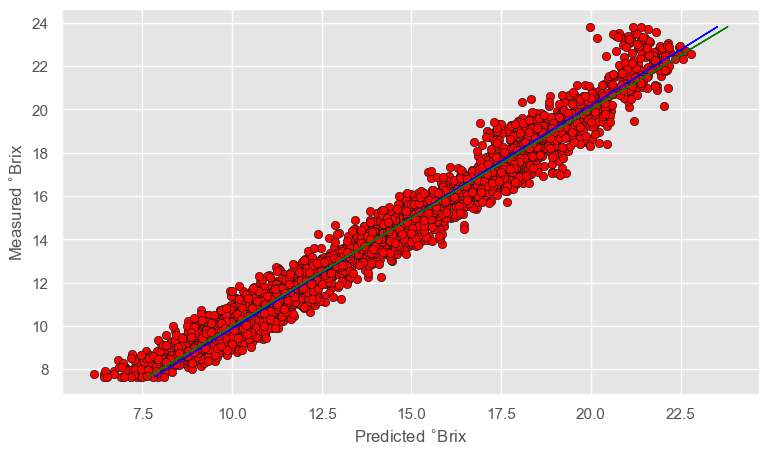

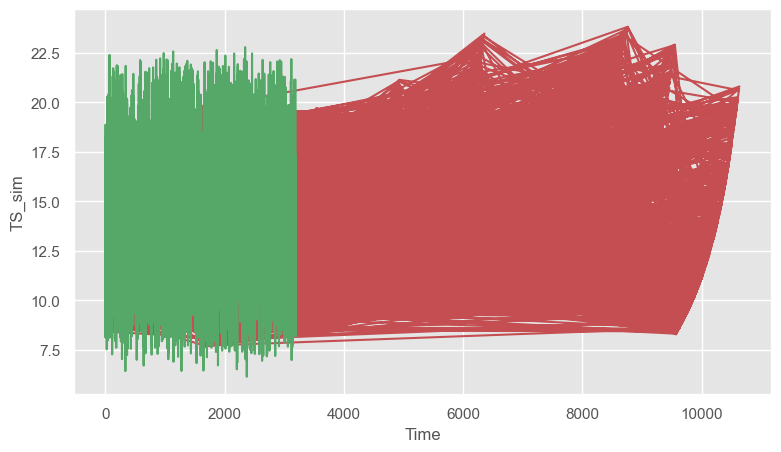

Elapsed time (in secs) :  89.2


In [4]:
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=files, split_params=split_params, test_size=float(split_size[3]))

preprocessor_params = {
    'savgol' : {
        'window_size_range' : np.arange(3,63,3),
        'polyorder_range' : np.arange(2,18,2),
        'derivative' : 1
    }
}

pipeline_params = {
    'data' : data,
    'validation-type' : validation_types[1],
    'preprocessor' : preprocessors[6],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
util.pipeline(pipeline_params)
end = timer()
print(f"Elapsed time (in secs) : ",round((end - start),2))

<h2 style="color: #dddda1">Pipeline 5 (4 Files + SAVGOL1+MSC + STRATIFIED-KFOLDS CV + PLS + MSE)</h2>

100% Validation completed 

Best and optimized n_components value for PLS model : 39
[Model Evaluation] MSE value between y_test and y_pred : 0.577


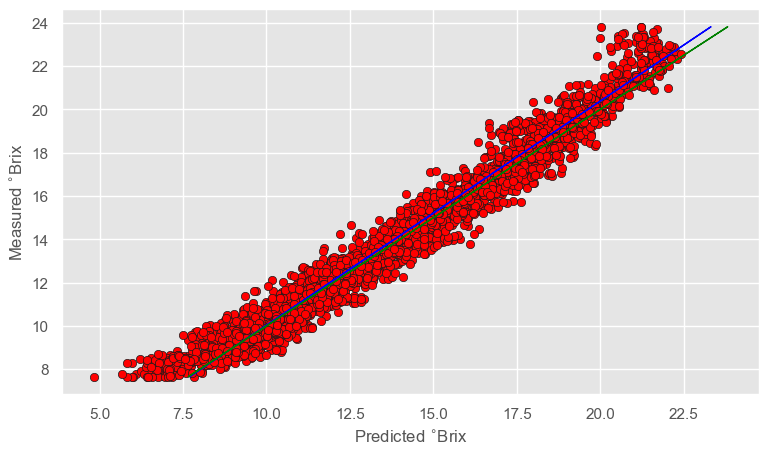

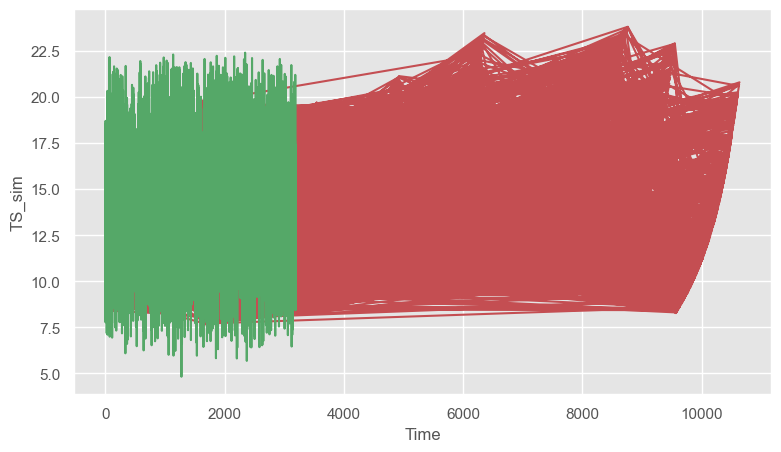

Elapsed time (in secs) :  96.33


In [4]:
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=files, split_params=split_params, test_size=float(split_size[3]))

preprocessor_params = {
    'savgol' : {
        'window_size_range' : np.arange(3,63,3),
        'polyorder_range' : np.arange(2,18,2),
        'derivative' : 1
    }
}

pipeline_params = {
    'data' : data,
    'validation-type' : validation_types[1],
    'preprocessor' : preprocessors[9],
    'preprocessor-params' : preprocessor_params,
    'model' : models[0],
    'evaluator' : evaluators[0],
    'pls_max_n_comp' : int(pls_max_n_comp),
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
util.pipeline(pipeline_params)
end = timer()
print(f"Elapsed time (in secs) : ",round((end - start),2))